In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='/home/pratyush/Downloads/', untar=True)

228813984/228813984 [==============================] - 2s 0us/step


In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/tmp/.keras/datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/21134000558_d7d6c9b1fe_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/2944298800_1984bd4f8a_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/19453165201_2aa747e0bf.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/20156280765_a6baea3176.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/18828283553_e46504ae38.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/roses/16100313047_c2e23cbb3d_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/1445228333_59a07e0801.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/9433167170_fa056d3175.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/1645761726_2b1be95472.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/16691277899_9433f39155_n.jpg')]

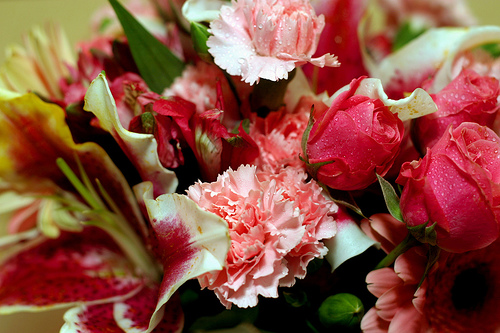

In [ ]:
PIL.Image.open(str(roses[1]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/roses/16100313047_c2e23cbb3d_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/1445228333_59a07e0801.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/9433167170_fa056d3175.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/1645761726_2b1be95472.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/16691277899_9433f39155_n.jpg')]

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(213, 320, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

In [ ]:
model.evaluate(X_test_scaled,y_test)

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 94s 1s/step - loss: 1.3292 - accuracy: 0.4302
Epoch 2/30
86/86 [==============================] - 91s 1s/step - loss: 1.0149 - accuracy: 0.6090
Epoch 3/30
86/86 [==============================] - 94s 1s/step - loss: 0.9132 - accuracy: 0.6421
Epoch 4/30
86/86 [==============================] - 91s 1s/step - loss: 0.8512 - accuracy: 0.6686
Epoch 5/30
86/86 [==============================] - 90s 1s/step - loss: 0.7992 - accuracy: 0.6930
Epoch 6/30
86/86 [==============================] - 91s 1s/step - loss: 0.7440 - accuracy: 0.7202
Epoch 7/30
86/86 [==============================] - 92s 1s/step - loss: 0.7313 - accuracy: 0.7188
Epoch 8/30
86/86 [==============================] - 92s 1s/step - loss: 0.7044 - accuracy: 0.7297
Epoch 9/30
86/86 [==============================] - 91s 1s/step - loss: 0.6778 - accuracy: 0.7369
Epoch 10/30
86/86 [==============================] - 94s 1s/step - loss: 0.6415 - accuracy: 0.7489
Epoch 11/30
86/86 [

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 9s 302ms/step - loss: 0.9929 - accuracy: 0.7113


[0.9928507804870605, 0.7113289833068848]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split

In [ ]:
# Download and load the flower dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='/home/pratyush/Downloads/', untar=True)

In [ ]:
data_dir = pathlib.Path(data_dir)

# List the images in the dataset
list(data_dir.glob('*/*.jpg'))[:5]


[PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/21134000558_d7d6c9b1fe_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/2944298800_1984bd4f8a_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/19453165201_2aa747e0bf.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/20156280765_a6baea3176.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/sunflowers/18828283553_e46504ae38.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}


In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Normalize the pixel values to the range [0, 1]
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Display the shapes of the training and testing sets
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (2752, 180, 180, 3)
X_test_scaled shape: (918, 180, 180, 3)


In [ ]:
num_classes = 5


In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# sample_image = X_train_scaled[0]
# sample_image = sample_image.reshape((1,) + sample_image.shape)

# fig, ax = plt.subplots(1, 5, figsize=(15, 3))  # Increase the number of subplots to 5

# # Display the original image
# ax[0].imshow(sample_image[0])
# ax[0].axis('off')
# ax[0].set_title('Original Image')

# # Display augmented images
# for i, batch in enumerate(datagen.flow(sample_image, batch_size=4)):  # Change batch_size to 4
#     ax[i + 1].imshow(batch[0])
#     ax[i + 1].axis('off')
#     ax[i + 1].set_title(f'Augmented Image {i + 1}')

# plt.show()


In [ ]:
augmented_datagen = datagen.flow(X_train_scaled, y_train, batch_size=32, shuffle=True)

In [ ]:
model.fit(augmented_datagen, epochs=30, steps_per_epoch=len(X_train_scaled)//32)

Epoch 1/30
86/86 [==============================] - 115s 1s/step - loss: 0.6926 - accuracy: 0.7449
Epoch 2/30
86/86 [==============================] - 112s 1s/step - loss: 0.6286 - accuracy: 0.7536
Epoch 3/30
86/86 [==============================] - 112s 1s/step - loss: 0.5958 - accuracy: 0.7762
Epoch 4/30
86/86 [==============================] - 113s 1s/step - loss: 0.5767 - accuracy: 0.7816
Epoch 5/30
86/86 [==============================] - 113s 1s/step - loss: 0.5805 - accuracy: 0.7758
Epoch 6/30
86/86 [==============================] - 113s 1s/step - loss: 0.5637 - accuracy: 0.7882
Epoch 7/30
86/86 [==============================] - 111s 1s/step - loss: 0.5710 - accuracy: 0.7809
Epoch 8/30
86/86 [==============================] - 114s 1s/step - loss: 0.5516 - accuracy: 0.7885
Epoch 9/30
86/86 [==============================] - 113s 1s/step - loss: 0.5339 - accuracy: 0.7900
Epoch 10/30
86/86 [==============================] - 114s 1s/step - loss: 0.5542 - accuracy: 0.7932
Epoch 11/

In [ ]:
model.evaluate(X_test_scaled, y_test)

NameError: ignored

#### How leaky relu will be useful over relu in case of image processing in deep learning network



Avoiding Dead Neurons:
Leaky ReLU helps prevent neurons from becoming completely inactive by allowing a small gradient for negative inputs. This is particularly beneficial when dealing with large and complex images, as it reduces the likelihood of neurons "dying" and not contributing to the learning process.

Handling Negative Input Information:
In some image processing scenarios, information in the negative part of the input may be relevant. Leaky ReLU allows the network to capture and propagate this information, albeit with a reduced magnitude.

Gradient Flow:
Leaky ReLU helps maintain a non-zero gradient for negative inputs, which can contribute to a smoother and more consistent flow of gradients during backpropagation. This can facilitate more stable and effective training, especially in deep networks.

Flexibility in Learning Representations:
The slight linearity introduced by the small slope in Leaky ReLU provides a level of flexibility in learning representations. This can be advantageous when the network needs to capture complex patterns and features in images.

#### Why gradually increasing layer size constantly increases performance?

Increased Capacity for Representation:
Larger layers have more parameters, providing the model with increased capacity to learn complex patterns and representations in the data. A network with more parameters can capture and represent intricate relationships between features, which is crucial for tasks with high complexity.

Feature Hierarchy:
In many real-world problems, features and patterns in the data may exist at multiple scales and levels of abstraction. Gradually increasing layer size allows the network to capture hierarchical representations. Lower layers can focus on capturing simple and local features, while deeper layers can learn more abstract and global representations.

Hierarchical Abstraction:
As the network processes information through successive layers, each layer can learn to abstract and represent increasingly complex features. This hierarchical abstraction is beneficial for tasks where understanding patterns requires considering both local and global context.

Parameter Sharing:
Larger layers enable more effective parameter sharing. Shared weights allow the network to learn common patterns and features across different regions of the input space. This parameter sharing contributes to better generalization and improved efficiency in learning.

Capacity to Learn Diverse Representations:
Larger layers provide the flexibility to learn a diverse set of representations. This is particularly useful when dealing with datasets that exhibit variations and complexities. The network can adapt to different aspects of the data by having the capacity to learn a variety of features.

Better Optimization Landscape:
Gradually increasing layer size can result in a smoother optimization landscape. This can facilitate more stable and efficient training. Smoother landscapes are less prone to getting stuck in local minima, making it easier for optimization algorithms to find better solutions.

Improved Expressiveness:
Larger layers enhance the expressiveness of the neural network, allowing it to model a wider range of functions. This is especially important when dealing with high-dimensional input spaces, such as images, where capturing complex relationships is crucial for achieving good performance.


#### Determining no of neurons for hidden layer

Model Capacity:
The number of neurons in the hidden layer contributes to the capacity of the model to learn and represent complex patterns in the data. Larger hidden layers can potentially capture more intricate relationships, but they also increase the risk of overfitting, especially if the amount of training data is limited.

Data Complexity:
The complexity of the task and the characteristics of the dataset play a role in determining the appropriate size of the hidden layer. For simpler tasks or datasets with fewer patterns to learn, a smaller hidden layer might be sufficient.

Architecture of the Network:
The overall architecture of the neural network, including the number of hidden layers, affects the choice of the hidden layer size. In deep networks, the hidden layers often gradually decrease or increase in size, and the architecture is designed to capture hierarchical representations.

Computational Resources:
The number of neurons in the hidden layer also impacts the computational resources required for training and inference. Larger hidden layers increase the model's parameter count, leading to longer training times and higher memory requirements.

Empirical Testing:
Experimentation is crucial in determining the optimal size of the hidden layer. You can try different sizes, train the model, and evaluate its performance on a validation set. This process helps in finding the right balance between model capacity and avoiding overfitting.


While there is no one-size-fits-all rule, a common practice is to use a number of neurons in the hidden layer that is between the number of input and output neurons. This can be a starting point, and you can adjust based on the specific characteristics of your problem.

In [ ]:
# Import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dense
from tensorflow.keras.layers import Dropout

# Build model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(96, (11,11), strides=(4,4), input_shape=(227,227,3)))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2) ))

# 2nd Convolutional Layer
model.add(Conv2D(256,(5,5), padding="same"))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3)))

# 3rd Convolutional Layer
model.add(Conv2D(384,(3,3), padding="same"))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(384,(3,3), padding="same"))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(256,(3,3), padding="same"))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3)))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 activation_6 (Activation)   (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 activation_7 (Activation)   (None, 27, 27, 256)       0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 9, 9, 256)         0         
 g2D)                                                 